<a href="https://colab.research.google.com/github/ASK3Y/Computational-Physics/blob/main/projects/P1_Power_Spectrum_of_the_Solar_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1 Power Spectrum of The Solar Cycle

The solar cycle is an 11-year oscillation in the Sun's activity. Write Python code to load in a data set containing the number of sunspots over the past 150 years. Plot the number of sunspots as a function of year. Then calculate the Fourier Transform and plot the power spectrum of the sunspot cycle. Does your power spectrum show peaks at particular periods? How do those peaks relate to the variations visible in the original time series plot? Describe the mathematics of the power spectrum and explain what it tells you about the data set.

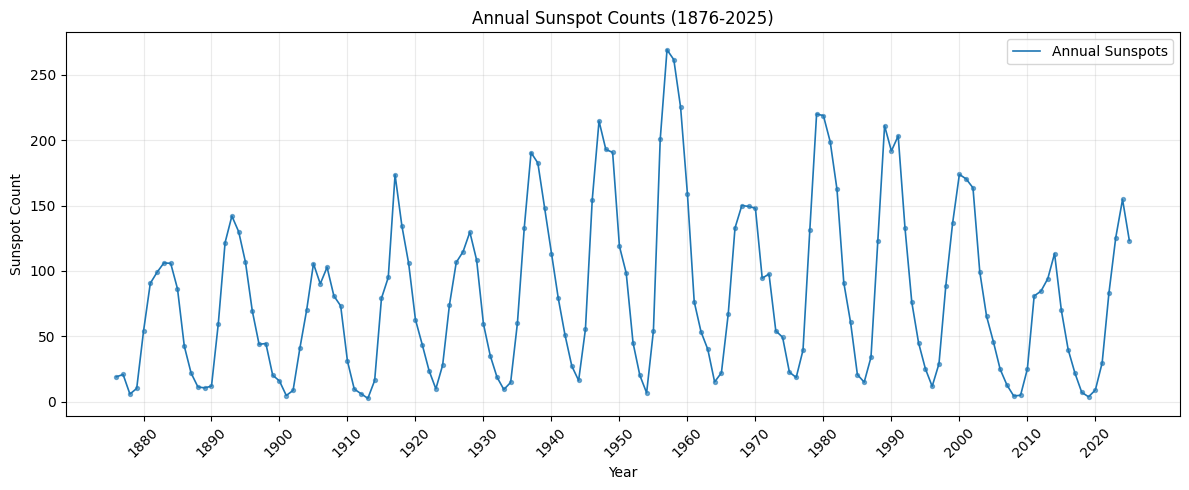

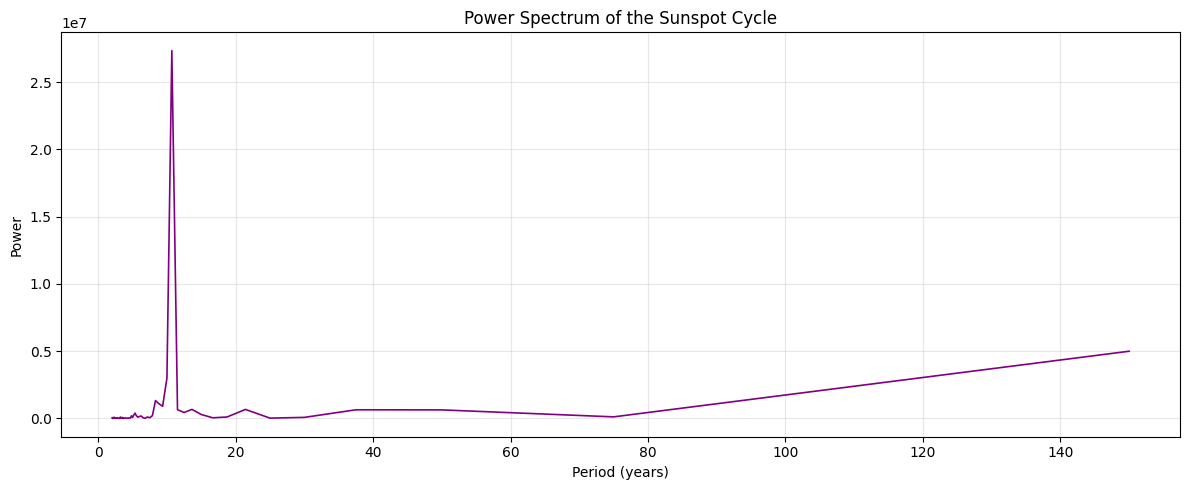

In [1]:
# number of sunspots over the past 150 years.
# 1876-2025

# 1876-1880:    18.9    20.7    5.7     10.0    53.7
# 1881-1890:    90.5    99.0    106.1   105.8   86.3    42.4    21.8    11.2    10.4    11.8
# 1891-1900:    59.5    121.7   142.0   130.0   106.6   69.4    43.8    44.4    20.2    15.7
# 1901-1910:    4.6     8.5     40.8    70.1    105.5   90.1    102.8   80.9    73.2    30.9
# 1911-1920:    9.5     6.0     2.4     16.1    79.0    95.0    173.6   134.6   105.7   62.7
# 1921-1930:    43.5    23.7    9.7     27.9    74.0    106.5   114.7   129.7   108.2   59.4
# 1931-1940:    35.1    18.6    9.2     14.6    60.2    132.8   190.6   182.6   148.0   113.0
# 1941-1950:    79.2    50.8    27.1    16.1    55.3    154.3   214.7   193.0   190.7   118.9
# 1951-1960:    98.3    45.0    20.1    6.6     54.2    200.7   269.3   261.7   225.1   159.0
# 1961-1970:    76.4    53.4    39.9    15.0    22.0    66.8    132.9   150.0   149.4   148.0
# 1971-1980:    94.4    97.6    54.1    49.2    22.5    18.4    39.3    131.0   220.1   218.9
# 1981-1990:    198.9   162.4   91.0    60.5    20.6    14.8    33.9    123.0   211.1   191.8
# 1991-2000:    203.3   133.0   76.1    44.9    25.1    11.6    28.9    88.3    136.3   173.9
# 2001-2010:    170.4   163.6   99.3    65.3    45.8    24.7    12.6    4.2     4.8     24.9
# 2011-2020:    80.8    84.5    94.0    113.3   69.8    39.8    21.7    7.0     3.6     8.8
# 2021-2025:    29.6    83.2    125.5   154.7   123.2

import numpy as np
import matplotlib.pyplot as plt

# Code to store the number of sunspots each year from 1876-2025
years = np.arange(1876, 2026)
sunspots = np.array([
    18.9, 20.7, 5.7, 10.0, 53.7,                                            # 1876-1880
    90.5, 99.0, 106.1, 105.8, 86.3, 42.4, 21.8, 11.2, 10.4, 11.8,           # 1881-1890
    59.5, 121.7, 142.0, 130.0, 106.6, 69.4, 43.8, 44.4, 20.2, 15.7,         # 1891-1900
    4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9,             # 1901-1910
    9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6, 105.7, 62.7,             # 1911-1920
    43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4,          # 1921-1930
    35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0, 113.0,         # 1931-1940
    79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9,        # 1941-1950
    98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0,         # 1951-1960
    76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0,         # 1961-1970
    94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9,          # 1970-1980
    198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8,        # 1981-1990
    203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9,         # 1991-2000
    170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9,             # 2001-2010
    80.8, 84.5, 94.0, 113.3, 69.8, 39.8, 21.7, 7.0, 3.6, 8.8,               # 2011-2020
    29.6, 83.2, 125.5, 154.7, 123.2],                                       # 2021-2025
    dtype=float
)

# Plotting the sunspot data as a function of year

plt.figure(figsize=(12, 5))                                                             # Figure size of 12*5 inches
plt.plot(years, sunspots, color='tab:blue', linewidth=1.2, label='Annual Sunspots')     # Blue line connecting the sunspot values chronologically, controls line thickness, names the series for a legend
plt.scatter(years, sunspots, s=8, color='tab:blue', alpha=0.6)                          # Small blue markers at each year, s=8 sets marker size, alpha=0.6 sets transparency

plt.title('Annual Sunspot Counts (1876-2025)')                                          # Sets the plot title at the top of the figure
plt.xlabel('Year')                                                                      # X axis label
plt.ylabel('Sunspot Count')                                                             # Y axis label
plt.grid(alpha=0.25)                                                                    # This draws a grid on the plot, alpha=0.25 makes the grid lines faint by setting them at 25% opacity
plt.legend()                                                                            # Displays a legend for any plotted series that include a label= argument

plt.xticks(np.arange(1880, 2026, 10), rotation=45)                                      # Sets the X axis tick position to every 10 years from 1880-2025, rotation=45 rotates the tick labels 45 degrees
plt.tight_layout()                                                                      # Automatically adjusts the plots parameters so labels, titles, and ticks don't overlap or get cut off
plt.show()                                                                              # Displays the plot

# Code for the Fourier Transform with the sunspot data over the past 150 years

N = len(sunspots)           # sample number
dt = 1.0                    # sampling interval = 1 year

# Calculate Fast Fourier Transform (FFT)
fft_vals = np.fft.fft(sunspots)                                     # This tells us how much power each frequency has
freqs = np.fft.fftfreq(N, dt)                                       # This tells us which frequency each FFT component corresponds to

# Power Spectrum (magnitude squared)
power = np.abs(fft_vals)**2                                         # This code calculates the spower spectrum of the sunspot data collected over the past 150 years

# We only want to keep the positive frequencies
mask = freqs > 0                                                    # This is a boolean mask that will help identify the positive and negative frequencies in the dataset
freqs_pos = freqs[mask]                                             # This applies a mask to the freqs array that keeps all the positive frequencies and removes all of the negative frequencies
power_pos = power[mask]                                             # This applies a mask so that only the power values corresponding to the positive frequncies are kept

# Convert frequency to period
periods = 1 / freqs_pos                                             # The equation to calculate the Time Period from a known frequency is T = 1/f or P = 1/f

# Plot Power Spectrum
plt.figure(figsize=(12, 5))                                         # This sets dimensions of the plot produced to 12*5 inches
plt.plot(periods, power_pos, color='purple', linewidth=1.2)         # This draws a line plot where the x-axis is periods, the y-axis is power_pos, the line is purple, the line is set to a thickness of 1.2
plt.xlabel("Period (years)")                                        # This sets the title for the X-axis
plt.ylabel("Power")                                                 # This sets the title for the Y-axis
plt.title("Power Spectrum of the Sunspot Cycle")                    # This sets the title for the plot
plt.grid(alpha=0.3)                                                 # This applies a grid to the plot with a set transparency of 30%

plt.tight_layout()                                                  # Automatically adjusts the plots parameters so labels, titles, and ticks don't overlap or get cut off
plt.show()                                                          # This displays the plot

The Power Spectrum plot shows a very prominent peak around 10-11 years.  This indicates a strong periodic signal in the sunspot cycle at that interval.  This is consitent with what we know as the 11-year solar cycle, where sunspot activity rises and falls in a pattern of roughly every 11 years.

The Power Spectrum shows that the data peaks at around 11 years which means there is a strong repeating pattern every 11 years.  The original Time Series plot shows the actual sunspot counts year by year.  On this plot you see waves of rising and falling activity roughly every 11 years.  Both of the plots visually show that there is a peak in sunspot activity every 11 years which can be connected to what we know as the 11-year solar cycle.

The Fourier Transform transforms the data collected on the number of sunspots counted each year over the past 150 years from a time domain (sunspot counts year by year) to a frequency domain (the strength of each cycle length).  This creates our Power Spectrum.  The Power Spectrum is the squared magnitude of each Fourier coefficient which gives us the strength of each frequency in the signal.  The peaks in this data indicate dominant periods.  In this case we saw a strong peak at 11 years meaning the sunspot count rises and falls in a roughly 11-year rhythm.  This confirms the solar cycle is in the data that I collected.